In [11]:
import requests
import pandas as pd
import urllib
import zipfile
import os
import shutil

## Merge zip data files

In [ ]:
# zip 파일 리스트(20170605-20170630)
# url="https://www.sec.gov/files/EDGAR_LogFileData_thru_Jun2017.html"
zip_strs="www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170605.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170606.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170607.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170608.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170609.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170610.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170611.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170612.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170613.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170614.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170615.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170616.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170617.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170618.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170619.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170620.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170621.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170622.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170623.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170624.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170625.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170626.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170627.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170628.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170629.zip www.sec.gov/dera/data/Public-EDGAR-log-file-data/2017/Qtr2/log20170630.zip"

zip_lists=str(zip_strs).split(' ')

filename_list=[]
date_list=[]
for i in range(0, len(zip_lists)):
    zip_lists[i]="http://"+zip_lists[i]
    if zip_lists[i].find('/'):
        filename=zip_lists[i].rsplit('/', 1)[1]
        filename_list.append(filename)
        date_list.append(filename[3:11])

In [12]:
file_destination = '../data/files/'
for i in range(len(filename_list)):
    zipfile.ZipFile("../data/zip-files/"+filename_list[i]).extract('log'+date_list[i]+'.csv')
    shutil.move("../data/log"+date_list[i]+'.csv', file_destination)

## Integrate Log Data

In [ ]:
log_df=pd.DataFrame([[""]*2], columns=['datetime', 'ip'])

In [ ]:
for i in range(len(filename_list)):
    df=pd.read_csv('../data/files/log'+date_list[i]+'.csv', sep=',')
    df['datetime']=df['date']+" "+df['time']
    df['datetime']=pd.to_datetime(df['datetime'])
    tdf=pd.DataFrame(df.groupby("datetime")['ip'].count())
    tdf.reset_index(drop=False, inplace=True)
    log_df=pd.concat([log_df,tdf])

In [15]:
log_df

,datetime,ip
0,,
0,2017-06-05 00:00:00,161
1,2017-06-05 00:00:01,165
2,2017-06-05 00:00:02,183
3,2017-06-05 00:00:03,235
...,...,...
85300,2017-06-30 23:46:44,4
85301,2017-06-30 23:46:45,4
85302,2017-06-30 23:46:46,2
85303,2017-06-30 23:46:47,4


- save to csv

In [16]:
log_df.to_csv("../data/log_df.csv", index=False)

### Data plot

In [2]:
import matplotlib.pyplot as plt

In [3]:
log_ddf=pd.read_csv("../data/log_df.csv")
log_ddf_0=log_ddf.fillna(0)
log_ddf_null=log_ddf.dropna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_1872\2961664118.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  log_ddf_null=log_ddf.dropna(0)


findfont: Font family ['HMFMPYUN'] not found. Falling back to DejaVu Sans.


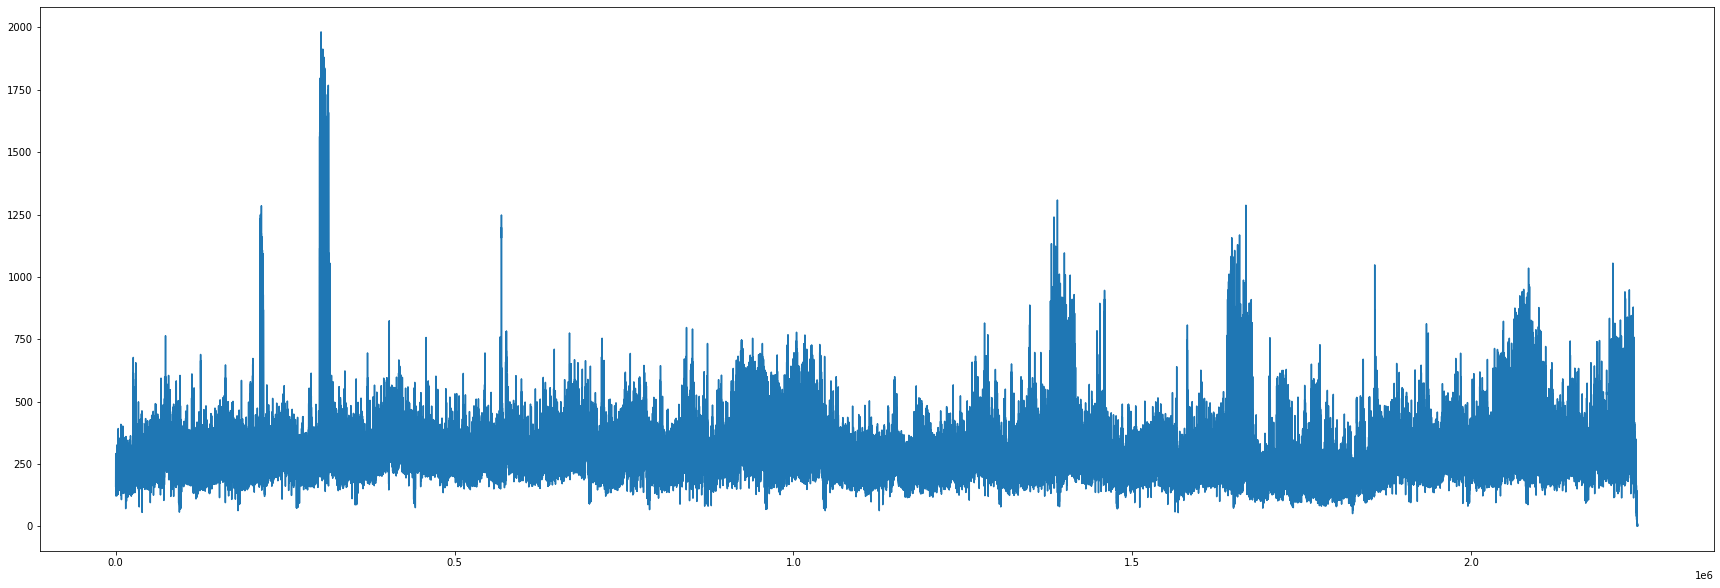

In [4]:
plt.figure(figsize=(30,10))

plt.plot(log_ddf_null['ip'])

plt.show()